<a href="https://colab.research.google.com/github/Twals20/Data-mining-/blob/main/DM_ProjectGroup_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Understanding
## 1.1 Background
The  Zambina legal system produces different types of legislative documents, such as *Bills*, *Acts*, and *Statutory Instruments (SIs)*. These documents are essential for governance, law enforcement, and civic education. However, due to the large volume of documents and their textual similarities, it is difficult for the general public and researchers to quickly identify and categorize them.

Manually classifying these documents is time-consuming and prone to errors. Therefore, applying data mining and machine learning techniques to automatically classify legislation can improve efficiency, accessibility, and public engagement with legal information.

## 1.2 Project Problem Statement
The increasing volume of Zambian legislative documents (Bills, Acts, and Statutory Instruments) makes manual classification inefficient, error-prone, and unsustainable. Currently, no automated system exists to categorize these documents, which limits accessibility and slows down research. This project addresses the problem by applying data mining and machine learning techniques to automatically classify legislative documents into their correct categories with improved accuracy and efficiency.

## 1.3 Data Mining Goals  

To achieve the business objectives, our project will focus on building a text classification model for legislative documents. Specifically, our goals are:  

1. Model Development: Train a supervised machine learning model (e.g., Logistic Regression, Random Forest, or Neural Network) that can classify legislative documents into predefined legal categories.  
2. Feature Extraction: Use Natural Language Processing (NLP) techniques such as TF-IDF or word embeddings to identify the most relevant keywords and features that drive the classification.  
3. Performance Evaluation: Validate the model using accuracy, precision, recall, and F1-score to ensure it meets the success criteria (≥ 80% accuracy).  
4. Interpretability: Ensure the model highlights the top features/keywords influencing each classification, making the results understandable for legal experts.  
5. Efficiency: Optimize the pipeline so that classification of a new document can be done in under 2 seconds.  

## 1.4 Project Objectives

1. Collect and Prepare Data:
Gather legislative documents (Bills, Acts, Statutory Instruments) from the National Assembly of Zambia and the Zambia Legal Information Institute, clean and label them for use in training and evaluation.

2. Develop a Classification Model:
Apply supervised machine learning techniques, using NLP-based feature extraction (e.g., TF-IDF, word embeddings), to classify documents into their correct categories.

3. Evaluate and Optimize Performance:
Validate the model using accuracy, precision, recall, and F1-score, aiming for at least 80% accuracy, and optimize classification speed to under 2 seconds per document.

4. Ensure Interpretability:
Incorporate mechanisms to highlight keywords or features influencing each classification, making outputs understandable to legal experts and non-experts.

5. Deliver a Usable System:
Package the trained model into a functional pipeline or prototype that can accept a legislative document and return its predicted category in real time.


## 1.5 Project Success Criteria

- *Model Accuracy: Achieve at least 80% classification accuracy* on a test dataset of legislative documents.
- *Interpretability*: The model should provide clear reasoning (e.g., top keywords or features) for each classification.
- *Practicality: The classification results should align with expert legal categorization at least 8 out of 10 times* when manually reviewed.
- *Efficiency: Classify a new document in under 2 seconds*.

- A working dataset of *at least 100–200 legislative documents* is collected and labeled.  
- The *project deliverables* (codebase, report, and presentation) are completed and submitted by the deadline.



# Data Understanding


In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
uploaded = files.upload()

df1 = pd.read_csv("zambia_legislation_dataset.csv")

Saving zambia_legislation_dataset.csv to zambia_legislation_dataset.csv


In [ ]:
import pandas as pd


df = pd.read_csv("/content/zambia_legislation_dataset.csv")

# Quick check
df.head()
df.shape
df.info()


In [ ]:
import pandas as pd

# Load your uploaded CSV
df = pd.read_csv("/content/zambia_legislation_dataset.csv")

# Check column names
print(df.columns)


In [ ]:
print(df.columns)


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
# Numeric summary
df.describe()            # Summary stats for numeric columns

# Year column exploration
df['Year'].value_counts()  # Count of laws per year

# Check for missing values in numeric columns
df[['Year']].isnull().sum()


In [ ]:
from google.colab import files
uploaded = files.upload()  # This opens a file picker to upload


In [ ]:
import pandas as pd
df = pd.read_csv("zambia_legislation_dataset.csv")


In [ ]:
#category counts
df['Category '].value_counts()

In [ ]:
#Instrument_type counts
df['Instrument-type '].value_counts()

In [ ]:
#unique values
df['Category '].unique()



# Visualisations


Histogram for year

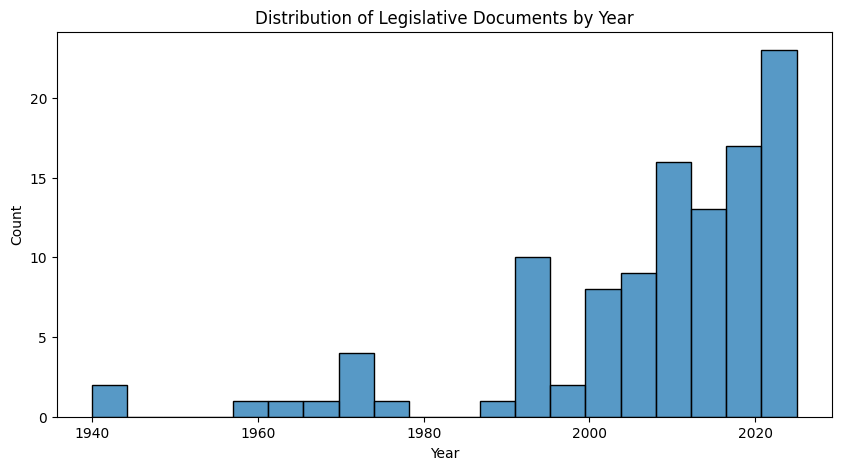

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame
df = pd.read_csv("/content/zambia_legislation_dataset.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

plt.figure(figsize=(10,5))
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # convert to numeric, handle missing
sns.histplot(df['Year'].dropna(), bins=20, kde=False)
plt.title("Distribution of Legislative Documents by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

Histogram for instrument-type

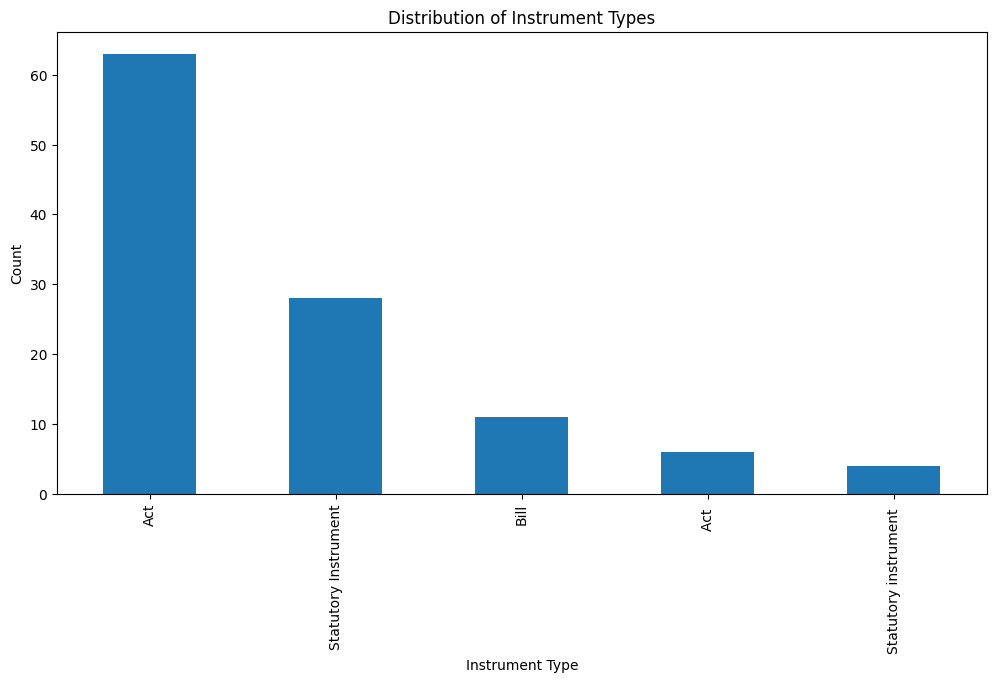

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame
df = pd.read_csv("/content/zambia_legislation_dataset.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

plt.figure(figsize=(12,6))
df['Instrument-type'].value_counts().plot(kind='bar')
plt.title("Distribution of Instrument Types")
plt.xlabel("Instrument Type")
plt.ylabel("Count")
plt.show()

Histogram for category

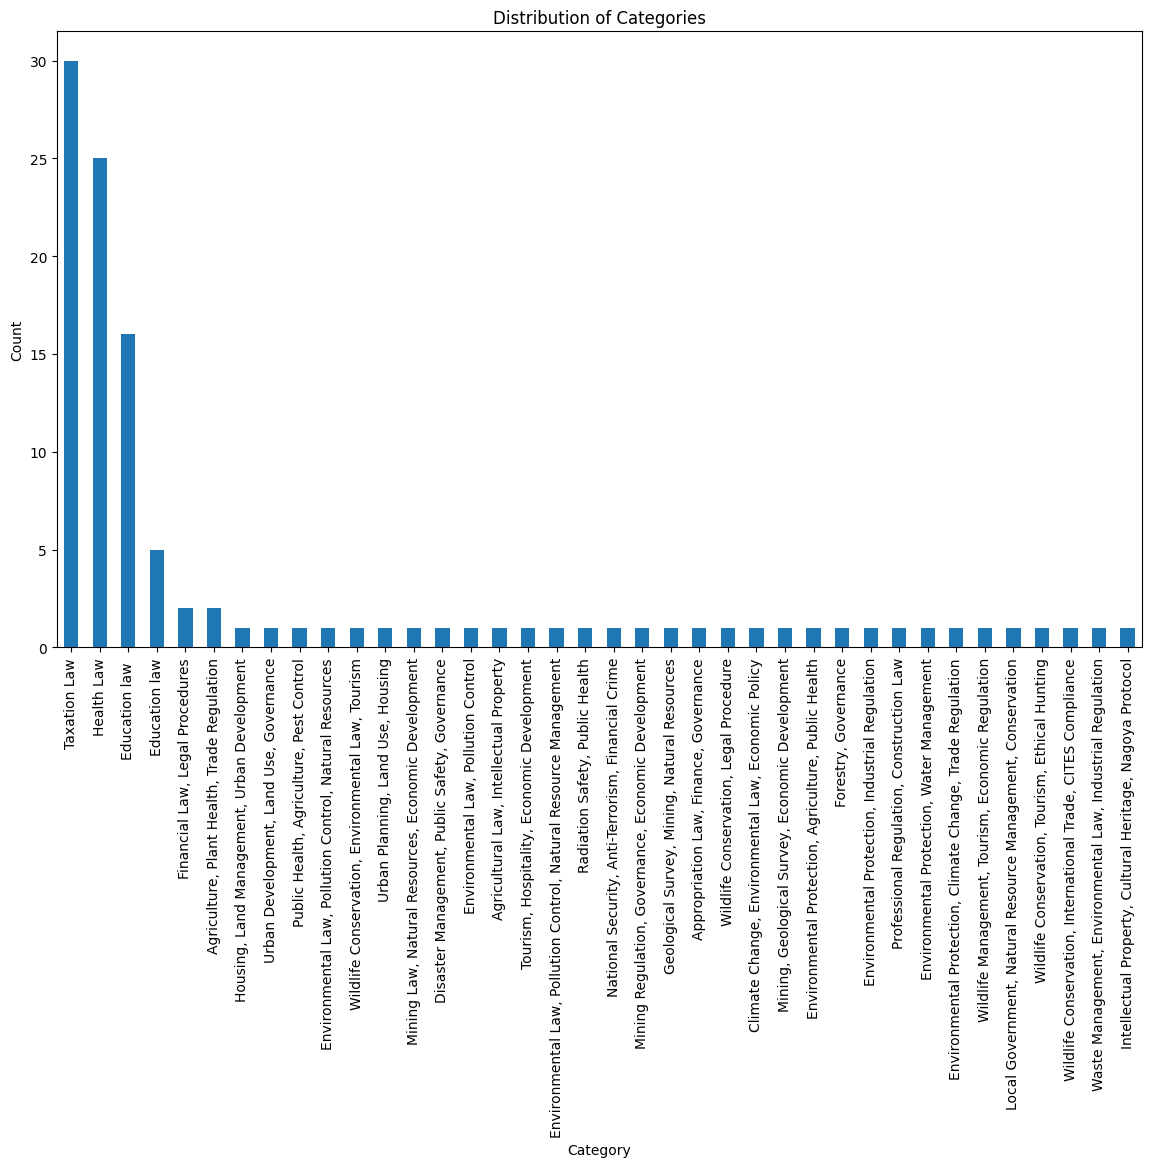

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame
df = pd.read_csv("/content/zambia_legislation_dataset.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

plt.figure(figsize=(14,8))
df['Category'].value_counts().plot(kind='bar')
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()